# Exam 14th of June 2023, 8.00-13.00 for the course 1MS041 (Introduction to Data Science / Introduktion till dataanalys)

## Instructions:
1. Complete the problems by following instructions.
2. When done, submit this file with your solutions saved, following the instruction sheet.

This exam has 3 problems for a total of 40 points, to pass you need
20 points.

## Some general hints and information:
* Try to answer all questions even if you are uncertain.
* Comment your code, so that if you get the wrong answer I can understand how you thought
this can give you some points even though the code does not run.
* Follow the instruction sheet rigorously.
* This exam is partially autograded, but your code and your free text answers are manually graded anonymously.
* If there are any questions, please ask the exam guards, they will escalate it to me if necessary.
* I (Benny) will visit the exam room at around 10:30 to see if there are any questions.

## Tips for free text answers
* Be VERY clear with your reasoning, there should be zero ambiguity in what you are referring to.
* If you want to include math, you can write LaTeX in the Markdown cells, for instance `$f(x)=x^2$` will be rendered as $f(x)=x^2$ and `$$f(x) = x^2$$` will become an equation line, as follows
$$f(x) = x^2$$
Another example is `$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$` which renders as
$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$

## Finally some rules:
* You may not communicate with others during the exam, for example:
    * You cannot ask for help in Stack-Overflow or other such help forums during the Exam.
    * You may not communicate with AI's, for instance ChatGPT.
    * Your on-line and off-line activity is being monitored according to the examination rules.

## Good luck!

In [1]:
# Insert your anonymous exam ID as a string in the variable below
examID="XXX"


---
## Exam vB, PROBLEM 1
Maximum Points = 14

A courier company operates a fleet of delivery trucks that make deliveries to different parts of the city. The trucks are equipped with GPS tracking devices that record the location of each truck at regular intervals. The locations are divided into three regions: downtown, the suburbs, and the countryside. The following table shows the probabilities of a truck transitioning between these regions at each time step:

| Current region | Probability of transitioning to downtown | Probability of transitioning to the suburbs | Probability of transitioning to the countryside |
|----------------|--------------------------------------------|-----------------------------------------------|------------------------------------------------|
| Downtown       | 0.3                                      | 0.4                                           | 0.3                                            |
| Suburbs        | 0.2                                      | 0.5                                           | 0.3                                            |
| Countryside    | 0.4                                      | 0.3                                           | 0.3                                            |

1. If a truck is currently in the suburbs, what is the probability that it will be in the downtown region after two time steps? [2p]
2. If a truck is currently in the suburbs, what is the probability that it will be in the downtown region **the first time** after two time steps? [2p]
3. Is this Markov chain irreducible? Explain your answer. [3p]
4. What is the stationary distribution? [3p]
5. Advanced question: What is the expected number of steps until the first time one enters the suburbs region having started in the downtown region. Hint: to get within 1 decimal point, it is enough to compute the probabilities for hitting times below 30. Motivate your answer in detail [4p]. You could also solve this question by simulation, but this gives you a maximum of [2p].



In [2]:
# Part 1
import numpy as np

# define prob matrix
p_matr = np.matrix([[0.3, 0.4, 0.3],
                   [0.2, 0.5, 0.3],
                   [0.4, 0.3, 0.3]])
# First transition time step is simply the matrix itself, which is p_matr
p2 = np.dot(p_matr, p_matr) # This is Second transition

# Here I print the matrix and look at the matrix to see from Suburbs to downtown region.
# I already know the corresponding rows and transitions from the exercise, so I can just look at the matrix to tell the answer
print("Resulting matrix is: \n", p2)


# Fill in the answer to part 1 below
problem1_p1 = 0.28
print("Probability of transitioning from Suburbs to downtown after two time steps is: ", problem1_p1)



Resulting matrix is: 
 [[0.29 0.41 0.3 ]
 [0.28 0.42 0.3 ]
 [0.3  0.4  0.3 ]]
Probability of transitioning from Suburbs to downtown after two time steps is:  0.28


In [3]:
# Part 2

# Fill in the answer to part 2 below
# Here, still two time steps but first time. So I need to check the possible paths on the first matrix we have,
# and the possible ways to get from Suburbs to Downtown. I need a transition diagram drawn to check and make it easier. 

# (0.5⋅0.2)+(0.3⋅0.4)=0.10+0.12=0.22.
problem1_p2 = ""

In [4]:
# Part 3

# Fill in the answer to part 3 below as a boolean

# Since there is simply no zero in the matrix, it's trivially irreducible. 
problem1_irreducible = True


## Part 3

Double click this cell to enter edit mode and write your answer for part 3 below this line.


In [5]:
# Part 4

# Fill in the answer to part 4 below

def get_stationary_distribution(transition_matrix):

    # transpose the matrix
    transition_matrix_t = transition_matrix.T
    # use linear algebra module of numpy to compute the eigenvalues
    eigenvals, eigenvects = np.linalg.eig(transition_matrix_t)

    # Find the indexes of the eigenvalues that are close to one.
    close_to_1_idx = np.isclose(eigenvals,1) # isclose checks element-wise if each element is close to 1 within the specific tolerance
    # Use them to select the target eigen vectors
    target_eigenvect = eigenvects[:,close_to_1_idx]
    #Flatten
    target_eigenvect = target_eigenvect[:,0]
    # Turn the eigenvector elements into probabilities
    # that would be the stationary distribution
    st_d = target_eigenvect / sum(target_eigenvect) 
    
    real_st_distr = st_d.real
    
    ## check
    if st_d.real.sum() != 1:
        raise Exception("The probabilities don't sum to 1!")
        
    return real_st_distr
# the answer should be a numpy array of length 3
# make sure that the entries sums to 1!
problem1_stationaryCode = get_stationary_distribution(p_matr)
problem1_stationaryCode


# This is my way of how to solve it:
# The stationary distribution after calculating it and putting equation system into wolframalpha gives:
stationary = np.array([0.2889, 0.4111, 0.3])
print("Stationary matrix is: \n", stationary)

Stationary matrix is: 
 [0.2889 0.4111 0.3   ]


In [6]:
# Part 5

# Fill in the answer to part 5 below
# That is, the expected number of steps


# Coefficients for the linear system:
# From the equations:
#   7*h_D - 3*h_C = 10
#  -4*h_D + 7*h_C = 10

A = np.array([
    [7, -3],
    [-4, 7]
])

b = np.array([10, 10])

# Solve A * x = b
solution = np.linalg.solve(A, b)

h_D, h_C = solution

problem1_ET = round(h_D, 1)
print("Expected steps to reach Suburbs starting from Downtown:", problem1_ET)

# The other solution without python code:
# Look at my notes in the PDF. 

Expected steps to reach Suburbs starting from Downtown: 2.7



## Part 5

Double click this cell to enter edit mode and write your answer for part 5 below this line.


---
## Exam vB, PROBLEM 2
Maximum Points = 13


You are given the "Abalone" dataset found in `data/abalone.csv`, which contains physical measurements of abalone (a type of sea shells) and the age of the abalone measured in **rings** (the number of rings in the shell) [https://en.wikipedia.org/wiki/Abalone](https://en.wikipedia.org/wiki/Abalone). Your task is to train a `linear regression` model to predict the age (Rings) of an abalone based on its physical measurements.

To evaluate your model, you will split the dataset into a training set and a testing set. You will use the training set to train your model, and the testing set to evaluate its performance.

1. Load the data into a pandas dataframe `problem2_df`. Based on the column names, figure out what are the features and the target and fill in the answer in the correct cell below. [2p]
2. Split the data into train and test. [2p]
3. Train the model. [1p]
4. On the test set, evaluate the model by computing the mean absolute error and plot the empirical distribution function of the residual with confidence bands (i.e. using the DKW inequality and 95% confidence). Hint: you can use the function `plotEDF,makeEDF` combo from `Utils.py` that we have used numerous times, which also contains the option to have confidence bands. [3p]
5. Provide a scatter plot where the x-axis corresponds to the predicted value and the y-axis is the true value, do this over the test set. [2p]
6. Reason about the performance, for instance, is the value of the mean absolute error good/bad and what do you think about the scatter plot in point 5? [3p]


-----
1. Load the data into a pandas dataframe `problem2_df`. Based on the column names, figure out what are the features and the target and fill in the answer in the correct cell below. [2p]


In [ ]:

# Part 1
# Let problem2_df be the pandas dataframe that contains the data from the file
# data/abalone.csv

import pandas as pd
problem2_df = pd.read_csv("data/abalone.csv")

In [2]:
problem2_df.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

## 1. [2p] Load data and choose features/target

We are working with the **Abalone** dataset stored in `data/abalone.csv`. After loading it into a pandas dataframe, we examine the available columns:

- Length  
- Diameter  
- Height  
- Whole weight  
- Shucked weight  
- Viscera weight  
- Shell weight  
- Rings  

Our goal is to build a **linear regression** model that predicts the **age** of an abalone. The age is measured in number of rings, so this column will be the **target variable**. We denote it by

$$Y = \text{Rings}.$$

For each observation \(i\), the physical measurements form a **feature vector**:

$$x_i = (\text{Length}_i,\ \text{Diameter}_i,\ \text{Height}_i,\ \text{Whole weight}_i,\ \text{Shucked weight}_i,\ \text{Viscera weight}_i,\ \text{Shell weight}_i).$$

Stacking these vectors forms the usual **design matrix**:

$$
X =
\begin{bmatrix}
- & x_1^\top & - \\
- & x_2^\top & - \\
  & \vdots   &   \\
- & x_n^\top & -
\end{bmatrix}
$$

Since the task is to predict the number of rings from all physical measurements, the **features** consist of all columns *except* `Rings`:

- Length  
- Diameter  
- Height  
- Whole weight  
- Shucked weight  
- Viscera weight  
- Shell weight  

The **target** is:

- Rings  

Thus, the feature set corresponds to the physical measurement columns, and the target corresponds to the abalone age in rings.


In [4]:
# Part 1

# Fill in the features as a list of strings of the names of the columns

# This also works
#problem2_features = list(problem2_df.columns)

problem2_features = [
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
]

# Define the target column (output Y) we want to predict.
# Here, 'Rings' represents the age of the abalone in number of rings.
problem2_target = 'Rings'


-----
2. Split the data into train and test. [2p]


## 2. [2p] Splitting the data into training and testing sets

After identifying the feature matrix $(X)$ and the target vector $(Y)$, the next step is to divide the dataset into two parts: a **training set** and a **testing set**. The training set is used to fit the linear regression model, while the testing set allows us to evaluate how well the trained model generalizes to unseen data.

To perform this split, we use the function `train_test_split`, which randomly partitions the dataset while preserving the correspondence between rows in $(X)$ and $(Y)$. In this task, we are instructed to allocate:

- **80%** of the data to the **training set**
- **20%** of the data to the **testing set**

Additionally, we specify a **random seed**:

$$\text{random\_state} = 42,$$

which ensures that the split is reproducible. Using the same seed will always produce the same partitioning of the data.

Letting $(X)$ denote the matrix of feature columns selected earlier, and $(Y)$ denote the target variable (Rings), the splitting process produces four components:

- $(X_{\text{train}})$: the training feature matrix  
- $(X_{\text{test}})$: the testing feature matrix  
- $(Y_{\text{train}})$: the training target vector  
- $(Y_{\text{test}})$: the testing target vector  

These four outputs allow us to train the model on the training portion of the data and later compute performance metrics on the testing portion.


In [5]:
# Part 2

from sklearn.model_selection import train_test_split

# Extract feature matrix X and target vector Y from the dataframe
X = problem2_df[problem2_features]
Y = problem2_df[problem2_target]

# Split the data into training and testing sets
# train_size=0.8 keeps 80% for training, random_state=42 ensures reproducibility
problem2_X_train, problem2_X_test, problem2_y_train, problem2_y_test = train_test_split(
    X, Y, train_size=0.8, random_state=42
)


-----
3. Train the model. [1p]


## 3. [1p] Training the linear regression model

Once the dataset has been split into training and testing subsets, the next step is to **train a linear regression model** using only the training data. In linear regression, we assume a relationship of the form

$$
Y \approx X\beta,
$$

where $(X)$ is the feature matrix, $(Y)$ is the target vector, and $(\beta)$ contains the model coefficients. The training procedure estimates the coefficients $(\beta)$ by minimizing the **mean squared error** on the training set.

To perform this in practice, we use the `LinearRegression` class from `sklearn.linear_model`. The training process involves:

1. Importing the model class.  
2. Creating an instance of the model.  
3. Fitting the model using  
   $$X_{\text{train}},\ Y_{\text{train}}.$$

After the model is trained, it stores the estimated coefficients and intercept, which can later be used to make predictions on the testing data.


In [6]:
# Part 3

from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
problem2_model = LinearRegression()

# Train (fit) the model on the training data
problem2_model.fit(problem2_X_train, problem2_y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


-----
4. On the test set, evaluate the model by computing the mean absolute error and plot the empirical distribution function of the residual with confidence bands (i.e. using the DKW inequality and 95% confidence). Hint: you can use the function `plotEDF,makeEDF` combo from `Utils.py` that we have used numerous times, which also contains the option to have confidence bands. [3p]


## 4. [3p] Mean absolute error and EDF of residuals with DKW confidence bands (without Utils)

In this step we evaluate the fitted linear regression model on the **test set** in two ways:

1. Compute the **mean absolute error (MAE)** of the predictions.
2. Plot the **empirical distribution function (EDF)** of the residuals with **95% confidence bands** based on the Dvoretzky–Kiefer–Wolfowitz (DKW) inequality.

---

### 4.1 Mean absolute error (MAE)

Let

- $X_{\text{test}} = \text{problem2\_X\_test}$ be the test feature matrix,
- $Y_{\text{test}} = \text{problem2\_y\_test}$ be the true targets on the test set,
- $\hat{Y}_{\text{test}}$ be the predictions obtained from the trained model.

We first compute the predictions:

$$
\hat{Y}_{\text{test}} = \text{problem2\_model.predict}(X_{\text{test}}).
$$

For each test point $i$, the **residual** is defined as

$$
r_i = y_i - \hat{y}_i,
$$

where $y_i$ is the true value and $\hat{y}_i$ the predicted value.

The **mean absolute error (MAE)** is

$$
\text{MAE} = \frac{1}{n_{\text{test}}} \sum_{i=1}^{n_{\text{test}}} \lvert y_i - \hat{y}_i \rvert
= \frac{1}{n_{\text{test}}} \sum_{i=1}^{n_{\text{test}}} \lvert r_i \rvert.
$$

In code, we will either use `mean_absolute_error` from `sklearn.metrics` or compute this formula directly and store the result in `problem2_mae`.

---

### 4.2 Empirical distribution function (EDF) of residuals

We now study the **distribution of the residuals** on the test set.

Let the residuals be

$$
r_1, r_2, \dots, r_{n_{\text{test}}}.
$$

Sort them in increasing order:

$$
r_{(1)} \le r_{(2)} \le \dots \le r_{(n_{\text{test}})}.
$$

The **empirical distribution function** (EDF) of the residuals is defined as

$$
\hat{F}_n(x) = \frac{1}{n_{\text{test}}} \sum_{i=1}^{n_{\text{test}}} \mathbf{1}\{r_i \le x\}.
$$

At the sorted points $r_{(i)}$ this is simply

$$
\hat{F}_n(r_{(i)}) = \frac{i}{n_{\text{test}}}, \quad i = 1, \dots, n_{\text{test}}.
$$

To **plot** the EDF:

1. Compute the residuals $r_i$.
2. Sort them to get an array `residuals_sorted`.
3. Compute the EDF values `edf_values` where  
   $$
   \text{edf\_values}[i] = \frac{i+1}{n_{\text{test}}}
   $$  
   for zero-based indexing.
4. Use a step plot (for example `plt.step`) to visualize the EDF.

This gives a non-parametric view of how the residuals are distributed.

---

### 4.3 DKW inequality and 95% confidence bands

The **Dvoretzky–Kiefer–Wolfowitz (DKW) inequality** provides a uniform bound on the difference between the EDF $\hat{F}_n(x)$ and the true (unknown) distribution function $F(x)$:

$$
\mathbb{P}\Bigl( \sup_x \lvert \hat{F}_n(x) - F(x) \rvert > \varepsilon \Bigr)
\le 2 e^{-2 n_{\text{test}} \varepsilon^2}.
$$

For a given confidence level $1 - \alpha$ (here $95\%$, so $\alpha = 0.05$), we solve for $\varepsilon$ such that

$$
2 e^{-2 n_{\text{test}} \varepsilon^2} = \alpha.
$$

This gives

$$
\varepsilon = \sqrt{\frac{1}{2 n_{\text{test}}} \log\Bigl(\frac{2}{\alpha}\Bigr)}.
$$

With this $\varepsilon$, a **uniform confidence band** for $F(x)$ is

$$
\hat{F}_n(x) - \varepsilon \le F(x) \le \hat{F}_n(x) + \varepsilon
$$

for all $x$, with probability at least $1 - \alpha$.

In practice we compute:

- For each EDF point:  
  $$
  \text{lower}(x) = \max\bigl(0, \hat{F}_n(x) - \varepsilon\bigr),
  $$  

  $$
  \text{upper}(x) = \min\bigl(1, \hat{F}_n(x) + \varepsilon\bigr).
  $$

These two curves form the **confidence band** around the EDF.

---

### 4.4 Interpretation

The **confidence band** around the EDF of the residuals tells us:

- With probability at least $95\%$, the **true** cumulative distribution function of the residuals lies within this band at **all** $x$.
- It quantifies the uncertainty due to having only a finite test sample.
- It can be used to assess whether the residual distribution has unexpected features (for example very heavy tails or strong skewness) that might suggest model misspecification or that a linear model with constant variance may not be adequate.

In the plot, we will show:

- The EDF of the residuals (step function).
- The lower and upper DKW confidence curves as bands around it.


Mean Absolute Error on test set: 1.629248267393658


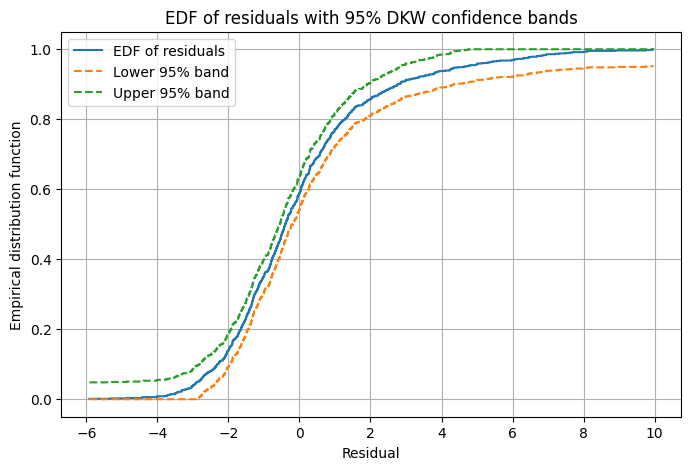

In [11]:
# Part 4

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# ----- Mean absolute error (MAE) -----

# Predict the target on the test set using the trained model
problem2_y_pred = problem2_model.predict(problem2_X_test)

# Compute the mean absolute error between true and predicted values
problem2_mae = mean_absolute_error(problem2_y_test, problem2_y_pred)

print("Mean Absolute Error on test set:", problem2_mae)

# ----- Empirical distribution function (EDF) of residuals with DKW bands -----

# Compute residuals: true - predicted
residuals = problem2_y_test - problem2_y_pred
residuals = np.asarray(residuals)

# Number of test samples
n_test = residuals.shape[0]

# Sort residuals for EDF
residuals_sorted = np.sort(residuals)

# EDF values: i / n for i = 1,...,n (using 0-based indexing -> (np.arange(n_test) + 1) / n_test)
edf_values = (np.arange(n_test) + 1) / n_test

# DKW epsilon for 95% confidence: alpha = 0.05
alpha = 0.05
epsilon = np.sqrt(1.0 / (2.0 * n_test) * np.log(2.0 / alpha))

# Compute lower and upper confidence bands and clip to [0, 1]
lower_band = np.clip(edf_values - epsilon, 0.0, 1.0)
upper_band = np.clip(edf_values + epsilon, 0.0, 1.0)

# ----- Plot EDF and DKW confidence bands -----

plt.figure(figsize=(8, 5))

# EDF as a step function
plt.step(residuals_sorted, edf_values, where="post", label="EDF of residuals")

# Confidence bands
plt.step(residuals_sorted, lower_band, where="post", linestyle="--", label="Lower 95% band")
plt.step(residuals_sorted, upper_band, where="post", linestyle="--", label="Upper 95% band")

plt.xlabel("Residual")
plt.ylabel("Empirical distribution function")
plt.title("EDF of residuals with 95% DKW confidence bands")
plt.legend()
plt.grid(True)
plt.show()


-----
5. Provide a scatter plot where the x-axis corresponds to the predicted value and the y-axis is the true value, do this over the test set. [2p]


## 5. [2p] Scatter plot of predicted vs. true values on the test set

A useful diagnostic for regression models is a **scatter plot comparing predicted values to true values**.  
For each observation in the **test set**, we plot a point with:

- **x-axis:** the predicted value $\hat{y}_i$
- **y-axis:** the true value $y_i$

If the model were perfect, every point would lie exactly on the **45-degree identity line**

$$
y = \hat{y}.
$$

Deviations from this line show where the model **overpredicts** or **underpredicts**:

- Points **above** the line correspond to $y_i > \hat{y}_i$ (underprediction).  
- Points **below** the line correspond to $y_i < \hat{y}_i$ (overprediction).

By plotting both the scatter and the identity line, we get a clear visual understanding of:

- systematic bias,
- variance patterns,
- whether the model struggles at certain ranges of the target variable.

The scatter plot is computed **only over the test set**, because this visual should reflect the model’s performance on unseen data and is part of model evaluation.


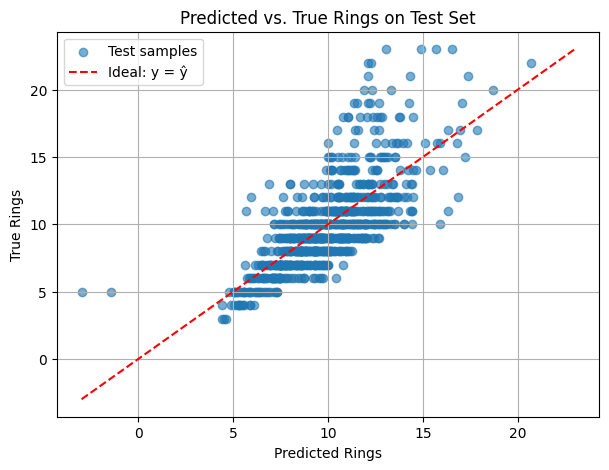

In [12]:
# Part 5

import matplotlib.pyplot as plt
import numpy as np

# Predicted values on the test set
y_pred = problem2_model.predict(problem2_X_test)

# True values on the test set
y_true = problem2_y_test

# Create scatter plot
plt.figure(figsize=(7, 5))
plt.scatter(y_pred, y_true, alpha=0.6, label="Test samples")

# Identity line (perfect predictions)
min_val = min(np.min(y_pred), np.min(y_true))
max_val = max(np.max(y_pred), np.max(y_true))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label="Ideal: y = ŷ")

plt.xlabel("Predicted Rings")
plt.ylabel("True Rings")
plt.title("Predicted vs. True Rings on Test Set")
plt.legend()
plt.grid(True)
plt.show()


-----
6. Reason about the performance, for instance, is the value of the mean absolute error good/bad and what do you think about the scatter plot in point 5? [3p]

In [ ]:
# Part 6


## Part 6

Double click this cell to enter edit mode and write your answer for part 6 below this line.

#### Discussion on the value of the MAE

#### Discussion on the predicted vs. true scatterplot

#### Discussion


---
## Exam vB, PROBLEM 3
Maximum Points = 13


A healthcare organization is interested in understanding the relationship between the number of visits to the doctors office and certain patient characteristics. 
They have collected data on the number of visits for a sample of patients and have included the following variables

* ofp : number of physician office visits
* ofnp : number of nonphysician office visits
* opp : number of physician outpatient visits
* opnp : number of nonphysician outpatient visits
* emr : number of emergency room visits
* hosp : number of hospitalizations
* exclhlth : the person is of excellent health (self-perceived)
* poorhealth : the person is of poor health (self-perceived)
* numchron : number of chronic conditions
* adldiff : the person has a condition that limits activities of daily living ?
* noreast : the person is from the north east region
* midwest : the person is from the midwest region
* west : the person is from the west region
* age : age in years (divided by 10)
* male : is the person male ?
* married : is the person married ?
* school : number of years of education
* faminc : family income in 10000$
* employed : is the person employed ?
* privins : is the person covered by private health insurance?
* medicaid : is the person covered by medicaid ?

Decide which patient features are resonable to use to predict the target "number of physician office visits". Hint: should we really use the "ofnp" etc variables?

Since the target variable is counts, a reasonable loss function is to consider the target variable as Poisson distributed where the parameter follows $\lambda = \exp(\alpha \cdot x + \beta)$ where $\alpha$ is a vector (slope) and $\beta$ is a number (intercept). That is, the parameter is the exponential of a linear function. The reason we chose this as our parameter, is that it is always positive which is when the Poisson distribution is defined. To be specific we make the following assumption about our conditional density of $Y \mid X$,
$$
    f_{Y \mid X} (y,x) = \frac{\lambda^{y} e^{-\lambda}}{y !}, \quad \lambda(x) = \exp(\alpha \cdot x + \beta).
$$

Recall from the lecture notes, (4.2) that in this case we should consider the log-loss (entropy) and that according to (4.2.1 Maximum Likelihood and regression) we can consider the conditional log-likelihood. Follow the steps of Example 1 and Example 2 in section (4.2) to derive the loss that needs to be minimized.

Hint: when taking the log of the conditional density you will find that the term that contains the $y!$ does not depend on $\lambda$ and as such does not depend on $\alpha,\beta$, it can thus be discarded. This will be essential due to numerical issues with factorials.

Instructions:

1. Load the file `data/visits_clean.csv` into the pandas dataframe `problem3_df`. Decide what should be features and target, give motivations for your choices. [3p]
2. Create the `problem3_X` and the `problem3_y` as numpy arrays with `problem3_X` being the features and `problem3_y` being the target. Do the standard train-test split with 80% training data and 20% testing data. Store these in the variables defined in the cells. [3p]
3. Implement $loss$ inside the class `PoissonRegression` by writing down the loss to be minimized, I have provided a formula for the $\lambda$ that you can use. [2p]
4. Now use the `PoissonRegression` class to train a Poisson regression model on the training data. [2p]
5. Come up with a reasonable metric to evaluate your model on the test data, compute it and write down a justification of this. Also, interpret your result and compare it to something naive. [3p]


-----
1. Load the file `data/visits_clean.csv` into the pandas dataframe `problem3_df`. Decide what should be features and target, give motivations for your choices. [3p]


In [ ]:
# Part 1
import pandas as pd
# Let problem3_df be the pandas dataframe that contains the data from the file
# data/visits_clean.csv

# sep=',' → columns are separated by commas (standard CSV)
# sep=' ' → columns are separated by spaces
# sep='\s+' → columns are separated by one or more spaces or tabs (flexible whitespace)
problem3_df = pd.read_csv("data/visits_clean.csv", sep = ' ')

problem3_df.head()

,ofp,ofnp,opp,opnp,emr,hosp,exclhlth,poorhlth,numchron,adldiff,...,midwest,west,age,male,married,school,faminc,employed,privins,medicaid
0,5,0,0,0,0,1,0,0,2,0,...,0,0,6.9,1,1,6,2.8810,1,1,0
1,1,0,2,0,2,0,0,0,2,0,...,0,0,7.4,0,1,10,2.7478,0,1,0
2,13,0,0,0,3,3,0,1,4,1,...,0,0,6.6,0,0,10,0.6532,0,0,1
3,16,0,5,0,1,1,0,1,2,1,...,0,0,7.6,1,1,3,0.6588,0,1,0
4,3,0,0,0,0,0,0,0,2,1,...,0,0,7.9,0,1,6,0.6588,0,1,0


In [25]:
# Part 1

# Decide features (exclude utilization variables)
problem3_features = [
    "exclhlth",
    "poorhlth",
    "numchron",
    "adldiff",
    "noreast",
    "midwest",
    "west",
    "age",
    "male",
    "married",
    "school",
    "faminc",
    "employed",
    "privins",
    "medicaid"
]

# Target
problem3_target = "ofp"



In [26]:
problem3_features

['exclhlth',
 'poorhlth',
 'numchron',
 'adldiff',
 'noreast',
 'midwest',
 'west',
 'age',
 'male',
 'married',
 'school',
 'faminc',
 'employed',
 'privins',
 'medicaid']

2. Create the `problem3_X` and the `problem3_y` as numpy arrays with `problem3_X` being the features and `problem3_y` being the target. Do the standard train-test split with 80% training data and 20% testing data. Store these in the variables defined in the cells. [3p]


## **Part 2 — Explanation**

To prepare the data for modeling, we must construct:

- $X$ = the matrix of features  
- $y$ = the target vector  

We use the feature names selected in Part 1 to extract the corresponding columns from the dataframe and convert them to NumPy arrays, since most machine-learning algorithms expect NumPy inputs.

Thus:

- $X = \text{problem3\_df[problem3\_features].to\_numpy()}$
- $y = \text{problem3\_df[problem3\_target].to\_numpy()}$

Next, we split the data into training and testing sets.  
The instructions require:

- 80% training data  
- 20% testing data  
- `random_state = 42` for reproducibility  

This gives us:

- $X_{\text{train}}, X_{\text{test}}, y_{\text{train}}, y_{\text{test}}$

These will be used for fitting and evaluating the Poisson regression model.


In [27]:
# Part 2

import numpy as np
from sklearn.model_selection import train_test_split

# Create X (features) and y (target) as numpy arrays
problem3_X = problem3_df[problem3_features].to_numpy()
problem3_y = problem3_df[problem3_target].to_numpy()

# Split the data into train and test (80% / 20%), random_state=42 for reproducibility
problem3_X_train, problem3_X_test, problem3_y_train, problem3_y_test = train_test_split(
    problem3_X,
    problem3_y,
    train_size=0.8,
    random_state=42
)


In [ ]:
# One hot encoding if this needed to be done:

from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd

def one_hot_encode(train_X, test_X, categorical_mask=None):
    """
    One-hot encode categorical columns in train_X and test_X.
    Automatically detects categorical columns unless a mask is provided.

    Parameters
    ----------
    train_X : pandas.DataFrame
        Training data
    test_X : pandas.DataFrame
        Test data
    categorical_mask : list or array of booleans (optional)
        If provided, True means the column is categorical.

    Returns
    -------
    train_encoded : numpy.ndarray
        Encoded training data
    test_encoded : numpy.ndarray
        Encoded test data
    """

    # Convert to DataFrame if given as NumPy
    if isinstance(train_X, np.ndarray):
        train_X = pd.DataFrame(train_X)
        test_X = pd.DataFrame(test_X)

    # Automatically detect categorical (object or bool) if mask not given
    if categorical_mask is None:
        categorical_mask = train_X.dtypes == "object"

    # Split into categorical and numeric
    cat_train = train_X.loc[:, categorical_mask]
    num_train = train_X.loc[:, ~categorical_mask]

    cat_test = test_X.loc[:, categorical_mask]
    num_test = test_X.loc[:, ~categorical_mask]

    # Create and fit encoder only on training data
    encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    encoder.fit(cat_train)

    # Transform both train and test
    cat_train_encoded = encoder.transform(cat_train)
    cat_test_encoded = encoder.transform(cat_test)

    # Combine numeric + encoded categorical
    train_final = np.hstack([num_train.to_numpy(), cat_train_encoded])
    test_final = np.hstack([num_test.to_numpy(), cat_test_encoded])

    return train_final, test_final


3. Implement $loss$ inside the class `PoissonRegression` by writing down the loss to be minimized, I have provided a formula for the $\lambda$ that you can use. [2p]


## Part 3 — Deriving and Implementing the Poisson Regression Loss

We assume the conditional distribution

$$
Y \mid X = x \sim \text{Poisson}(\lambda(x)),
\quad
\lambda(x) = \exp(\alpha \cdot x + \beta).
$$

The conditional density is

$$
f_{Y \mid X}(y,x)
= \frac{\lambda(x)^y e^{-\lambda(x)}}{y!}.
$$

Taking the log gives the conditional log-likelihood for a single observation:

$$
\log f_{Y \mid X}(y,x)
= y \log \lambda(x) - \lambda(x) - \log(y!).
$$

Using the link

$$
\lambda(x) = \exp(\alpha \cdot x + \beta),
$$

we get

$$
\log \lambda(x) = \alpha \cdot x + \beta.
$$

Thus,

$$
\log f_{Y \mid X}(y,x)
= y (\alpha \cdot x + \beta)
- \exp(\alpha \cdot x + \beta)
- \log(y!).
$$

The term $\log(y!)$ does not depend on $\alpha$ or $\beta$, so it can be dropped when defining the loss we minimize.

For $n$ observations $(x_i, y_i)$, the (simplified) average log-likelihood is

$$
\ell(\alpha,\beta)
= \frac{1}{n} \sum_{i=1}^n 
\left[
y_i (\alpha \cdot x_i + \beta)
- \exp(\alpha \cdot x_i + \beta)
\right].
$$

To turn this into a loss to minimize, we take the **negative** average log-likelihood:

$$
\text{Loss}(\alpha,\beta)
=
- \ell(\alpha,\beta)
=
\frac{1}{n} \sum_{i=1}^n
\left[
\exp(\alpha \cdot x_i + \beta)
- y_i (\alpha \cdot x_i + \beta)
\right].
$$

In the provided `PoissonRegression` class, `coeffs[:-1]` corresponds to $\alpha$ and `coeffs[-1]` corresponds to $\beta$.  
Define

$$
\eta_i = \alpha \cdot x_i + \beta,
\quad
\lambda_i = \exp(\eta_i).
$$

Then the loss implemented in code is

$$
\text{Loss}(\alpha,\beta)
= \frac{1}{n} \sum_{i=1}^n
\left[
\lambda_i
- y_i \eta_i
\right].
$$

In NumPy, for the data matrices:

- `X` is the matrix of features (each row is $x_i$),
- `Y` is the vector of targets (each element is $y_i$),

we implement inside `loss(coeffs)`:

1. Compute the linear predictor:
   $$
   \eta = X \cdot \alpha + \beta
   $$
2. Compute
   $$
   \lambda = \exp(\eta)
   $$
3. Return the mean of
   $$
   \lambda - Y \cdot \eta
   $$

That is,

$$
\text{loss} = \text{np.mean}(\lambda - Y \cdot \eta).
$$


In [31]:
# Part 3

# Fill in the function loss below

class PoissonRegression(object):
    def __init__(self):
        self.coeffs = None
        self.result = None
    
    def fit(self,X,Y):
        import numpy as np
        from scipy import optimize

        # define the objective/cost/loss function we want to minimize
        def loss(coeffs):
            # The parameter lambda for the given X and the proposed values 
            # of the coefficients, here coeff[:-1] represent alpha 
            # and coeff[-1] represent beta
            # coeffs[:-1] = alpha (slopes), coeffs[-1] = beta (intercept)
            eta = np.dot(X, coeffs[:-1]) + coeffs[-1]   # linear predictor
            lam = np.exp(eta)                           # lambda(x) = exp(eta)

            # Negative average log-likelihood (constant log(y!) dropped)
            # Loss = mean( lam - Y * eta )
            return np.mean(lam - Y * eta)

        #Use the loss above together with an optimization method from scipy
        #to find the coefficients of the model
        #this is prepared for you below

        initial_arguments = np.zeros(shape=X.shape[1]+1) # initial guess as 0
        self.result = optimize.minimize(loss, initial_arguments,method='cg')
        self.coeffs = self.result.x
    
    def predict(self,X):
        #Use the trained model to predict Y
        if (self.coeffs is not None):
            return np.exp(np.dot(X,self.coeffs[:-1])+self.coeffs[-1])

4. Now use the `PoissonRegression` class to train a Poisson regression model on the training data. [2p]


## Part 4 — Training the Poisson Regression Model

Now that we have:

- the training feature matrix $X_{\text{train}}$
- the training target vector $y_{\text{train}}$
- the `PoissonRegression` class with a working `fit` method

we can initialize the model and train it.

The training is performed by calling:

$$
\text{problem3\_model.fit}(X_{\text{train}},\ y_{\text{train}})
$$

This runs the numerical optimization (Conjugate Gradient method) to minimize the Poisson loss and estimates the parameters $(\alpha, \beta)$.

After training, the optimizer’s output is stored in:



In [32]:
# Part 4

# Initialize your PoissonRegression model
problem3_model = PoissonRegression()

# Fit your initialized model on the training data
problem3_model.fit(problem3_X_train, problem3_y_train)




In [33]:
# Print optimization result to check success=True
print(problem3_model.result)


 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -4.623917557693579
       x: [-3.895e-01  2.815e-01 ...  2.823e-01  1.336e+00]
     nit: 457
     jac: [ 2.146e-06 -1.192e-07 ...  1.788e-06  4.232e-06]
    nfev: 16065
    njev: 945


-----
5. Come up with a reasonable metric to evaluate your model on the test data, compute it and write down a justification of this. Also, interpret your result and compare it to something naive. [3p]

## Part 5 — Choosing and Computing a Reasonable Evaluation Metric

### **1. What is a reasonable metric for Poisson regression?**

Since the target variable is **count data**, and Poisson regression models the **expected count**, a natural and widely used evaluation metric is the **Mean Squared Error (MSE)** between:

- the true counts: $y_{\text{test}}$
- the predicted Poisson means (expected values): $\hat{\lambda}_{\text{test}}$

Formally,

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n}
(y_i - \hat{\lambda}_i)^2.
$$

### **Why MSE is reasonable**
- Poisson regression predicts the **mean** of the count distribution, so comparing predicted vs. actual counts is meaningful.
- MSE is:
  - easy to interpret,
  - compares naturally to a naive model,
  - does **not** require probability distributions (like log-likelihood), which would be harder to interpret in an exam setting.

### **2. What is a naive model to compare with?**

A natural naive model is:

$$
\hat{y}_{\text{naive}} = \text{mean of the training target } y_{\text{train}}.
$$

This model predicts the same value for every patient (no personalization).  
If our Poisson regression performs better (lower MSE), the model is *usefully explaining variability*.

### **3. Interpretation**

- If the model’s MSE is **significantly smaller** than the naive model’s MSE, it means:
  - patient characteristics help explain variation in doctor visits,
  - the model captures meaningful structure in the data.

- If the MSE is *close* to the naive MSE:
  - the model does not improve much over simply predicting the average count.

### **4. What will be stored in `problem3_metric`?**

`problem3_metric` will store the **MSE on the test set**.

This value is what you report as your evaluation of model performance.


In [36]:
# Part 5

import numpy as np

# ----------------------------------------
# 1. MODEL PREDICTION MSE
# ----------------------------------------

# Predict expected counts (lambda_hat) on the test data
problem3_y_pred = problem3_model.predict(problem3_X_test)

# Compute Mean Squared Error of the Poisson regression model
problem3_metric = np.mean((problem3_y_test - problem3_y_pred) ** 2)

print("Poisson Regression Model MSE:", problem3_metric)


# ----------------------------------------
# 2. NAIVE BASELINE MSE
# ----------------------------------------

# Naive prediction: always predict the mean of the training target
naive_pred = np.mean(problem3_y_train)

# Compute the naive model's MSE on the test data
naive_mse = np.mean((problem3_y_test - naive_pred) ** 2)

print("Naive Baseline MSE (predicting mean):", naive_mse)


# ----------------------------------------
# 3. INTERPRETATION HELPER
# ----------------------------------------

if problem3_metric < naive_mse:
    print("Interpretation: The Poisson regression model performs BETTER than the naive baseline.")
elif problem3_metric == naive_mse:
    print("Interpretation: The Poisson regression model performs THE SAME as the naive baseline.")
else:
    print("Interpretation: The Poisson regression model performs WORSE than the naive baseline.")


Poisson Regression Model MSE: 45.23713496178929
Naive Baseline MSE (predicting mean): 50.82220354900361
Interpretation: The Poisson regression model performs BETTER than the naive baseline.



## Part 5

Double click this cell to enter edit mode and write your answer for part 5 below this line.

#### Discussion on reasonable metrics and discussion about the value of the metric

#### Comparison with a naive model
